##🐐 PROYECTO GOAT – MODELO ML COMPLETO

In [3]:
import pandas as pd

data = {
    "Jugador": [
        "Lionel Messi","Pelé","Diego Maradona","Cristiano Ronaldo",
        "Johan Cruyff","Alfredo Di Stéfano","Franz Beckenbauer",
        "Zinedine Zidane","Ronaldo Nazário","Michel Platini"
    ],
    "Titulos_totales": [46,39,17,34,21,23,21,15,16,12],
    "Copas_del_Mundo": [1,3,1,0,0,0,1,1,2,0],
    "Copa_America": [2,0,0,0,0,1,0,0,0,0],
    "Eurocopa": [0,0,0,1,0,0,1,1,0,1],
    "Finalissima": [1,0,1,0,0,0,0,0,0,1],
    "Libertadores": [0,2,0,0,0,0,0,0,0,0],
    "Champions": [4,0,0,5,3,5,3,1,0,1],
    "Goles": [896,767,353,964,433,509,156,156,414,353],
    "Asistencias": [407,355,213,260,353,213,100,80,130,168],
    "Balones_de_Oro": [8,0,0,5,3,2,2,1,2,3]
}

df = pd.DataFrame(data)

df

,Jugador,Titulos_totales,Copas_del_Mundo,Copa_America,Eurocopa,Finalissima,Libertadores,Champions,Goles,Asistencias,Balones_de_Oro
0,Lionel Messi,46,1,2,0,1,0,4,896,407,8
1,Pelé,39,3,0,0,0,2,0,767,355,0
2,Diego Maradona,17,1,0,0,1,0,0,353,213,0
3,Cristiano Ronaldo,34,0,0,1,0,0,5,964,260,5
4,Johan Cruyff,21,0,0,0,0,0,3,433,353,3
5,Alfredo Di Stéfano,23,0,1,0,0,0,5,509,213,2
6,Franz Beckenbauer,21,1,0,1,0,0,3,156,100,2
7,Zinedine Zidane,15,1,0,1,0,0,1,156,80,1
8,Ronaldo Nazário,16,2,0,0,0,0,0,414,130,2
9,Michel Platini,12,0,0,1,1,0,1,353,168,3



🏆 RANKING FINAL GOAT (MODELO ML COMBINADO)



,Jugador,GOAT_Score_Final,Score_Ponderado,Cluster
0,Lionel Messi,0.808026,0.680043,1
3,Cristiano Ronaldo,0.527619,0.504729,1
1,Pelé,0.483199,0.504889,0
5,Alfredo Di Stéfano,0.360146,0.303222,1
4,Johan Cruyff,0.293596,0.229137,1
9,Michel Platini,0.209146,0.241527,2
6,Franz Beckenbauer,0.207543,0.273195,2
8,Ronaldo Nazário,0.192544,0.225639,2
2,Diego Maradona,0.182631,0.188281,2
7,Zinedine Zidane,0.115194,0.191990,2


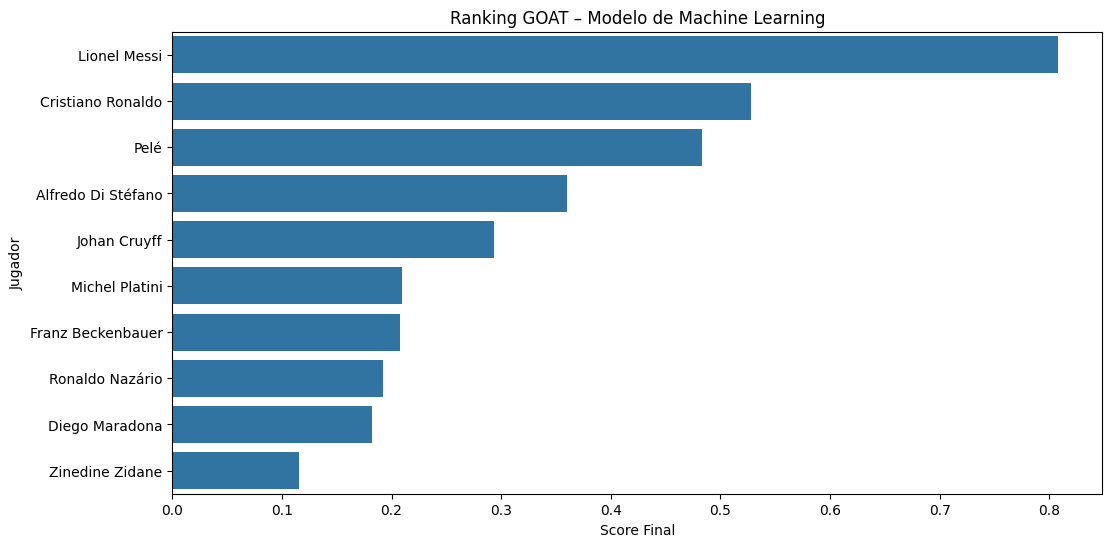


🔎 Según este modelo multicriterio, el GOAT es: 🐐 Lionel Messi


In [4]:
# ==========================================================
# 🐐 PROYECTO GOAT – MODELO DE MACHINE LEARNING COMPLETO
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# ----------------------------------------------------------
# 1️⃣ DATASET HISTÓRICO ACTUALIZADO
# ----------------------------------------------------------

data = {
    "Jugador": [
        "Lionel Messi","Pelé","Diego Maradona","Cristiano Ronaldo",
        "Johan Cruyff","Alfredo Di Stéfano","Franz Beckenbauer",
        "Zinedine Zidane","Ronaldo Nazário","Michel Platini"
    ],
    "Titulos": [46,39,17,34,21,23,21,15,16,12],
    "Mundial": [1,3,1,0,0,0,1,1,2,0],
    "CopaAmerica": [2,0,0,0,0,1,0,0,0,0],
    "Eurocopa": [0,0,0,1,0,0,1,1,0,1],
    "Finalissima":[1,0,1,0,0,0,0,0,0,1],
    "Libertadores":[0,2,0,0,0,0,0,0,0,0],
    "Champions":[4,0,0,5,3,5,3,1,0,1],
    "Goles":[896,767,353,964,433,509,156,156,414,353],
    "Asistencias":[407,355,213,260,353,213,100,80,130,168],
    "BalonesOro":[8,0,0,5,3,2,2,1,2,3]
}

df = pd.DataFrame(data)

variables = df.columns[1:]

# ----------------------------------------------------------
# 2️⃣ NORMALIZACIÓN DE VARIABLES
# ----------------------------------------------------------

scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(
    scaler.fit_transform(df[variables]),
    columns=variables
)

# ----------------------------------------------------------
# 3️⃣ MODELO 1 – SCORE PONDERADO (MULTICRITERIO)
# ----------------------------------------------------------

# Se asignan pesos dando mayor importancia a torneos grandes
pesos = np.array([
    0.10,  # Títulos totales
    0.20,  # Mundial
    0.08,  # Copa América
    0.08,  # Eurocopa
    0.05,  # Finalissima
    0.07,  # Libertadores
    0.12,  # Champions
    0.15,  # Goles
    0.05,  # Asistencias
    0.10   # Balones de Oro
])

df["Score_Ponderado"] = df_normalizado.values.dot(pesos)

# ----------------------------------------------------------
# 4️⃣ MODELO 2 – PCA (ANÁLISIS DE COMPONENTES PRINCIPALES)
# ----------------------------------------------------------

X_std = StandardScaler().fit_transform(df[variables])

pca = PCA(n_components=1)
df["Score_PCA"] = pca.fit_transform(X_std)

# Normalizamos el score PCA para combinarlo
df["Score_PCA_norm"] = MinMaxScaler().fit_transform(df[["Score_PCA"]])

# ----------------------------------------------------------
# 5️⃣ MODELO 3 – CLUSTERING (KMEANS)
# ----------------------------------------------------------

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_std)

# ----------------------------------------------------------
# 6️⃣ SCORE FINAL COMBINADO
# ----------------------------------------------------------

df["GOAT_Score_Final"] = (
    df["Score_Ponderado"] * 0.6 +
    df["Score_PCA_norm"] * 0.4
)

df = df.sort_values("GOAT_Score_Final", ascending=False)

# ----------------------------------------------------------
# 7️⃣ RESULTADOS
# ----------------------------------------------------------

print("\n🏆 RANKING FINAL GOAT (MODELO ML COMBINADO)\n")
display(df[["Jugador","GOAT_Score_Final","Score_Ponderado","Cluster"]])

# ----------------------------------------------------------
# 8️⃣ VISUALIZACIÓN
# ----------------------------------------------------------

plt.figure(figsize=(12,6))
sns.barplot(data=df, x="GOAT_Score_Final", y="Jugador")
plt.title("Ranking GOAT – Modelo de Machine Learning")
plt.xlabel("Score Final")
plt.ylabel("Jugador")
plt.show()

# ----------------------------------------------------------
# 9️⃣ INTERPRETACIÓN AUTOMÁTICA
# ----------------------------------------------------------

mejor = df.iloc[0]["Jugador"]
print(f"\n🔎 Según este modelo multicriterio, el GOAT es: 🐐 {mejor}")